In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from IsingSolutions import ising2d_exact, ising3d_monte_carlo as ising3d_mc
from TNModels import AKLT3D
from scipy.interpolate import interp1d,PchipInterpolator
from glob import glob
import numpy as np
import os
from tqdm.auto import tqdm

In [17]:
def load_df(filenames):
    filenames=sorted(filenames,key=lambda x:os.path.getmtime(x))
    dfs=[]
    for filename in tqdm(filenames):
        df=pd.read_csv(filename)
        dfs.append(df)
        # print(filename)
    print('loaded {} files'.format(len(dfs)))
    df=pd.concat(dfs)
    df['magnetizationXY']=(df['magnetizationX']**2+df['magnetizationY']**2)**.5
    df['magnetizationXYZ']=(df['magnetizationX']**2+df['magnetizationY']**2+df['magnetizationZ']**2)**.5
    return df

In [18]:
# df_all=load_df(glob('./data/aklt3d_X10_scan_a*/*/observables.csv'))
df_all=load_df(glob('./data/AKLT3D_X10_scan_grid/*/observables.csv'))
df=df_all[df_all['iLayer']==60]
os.makedirs('./data_publish',exist_ok=True)
df.to_csv('./data_publish/AKLT3D_X10_scan_grid_observables.csv',index=False)
print('saved to ./data_publish/AKLT3D_X10_scan_grid_observables.csv')

  0%|          | 0/1331 [00:00<?, ?it/s]

loaded 1331 files


In [13]:
print(sorted(set(df['a1'])))
print(sorted(set(df['a2'])))
print(sorted(set(df['a3'])))

[0.0, 0.2309401076758503, 0.4618802153517006, 0.6928203230275509, 0.9237604307034012, 1.1547005383792517, 1.3856406460551018, 1.616580753730952, 1.8475208614068024, 2.0784609690826525, 2.309401076758503]
[0.0, 0.3651483716701107, 0.7302967433402215, 1.0954451150103324, 1.460593486680443, 1.8257418583505536, 2.1908902300206647, 2.5560386016907755, 2.921186973360886, 3.286335345030997, 3.651483716701108]
[0.0, 0.894427190999916, 1.788854381999832, 2.683281572999748, 3.577708763999664, 4.47213595499958, 5.366563145999496, 6.260990336999412, 7.155417527999328, 8.049844718999244, 8.94427190999916]


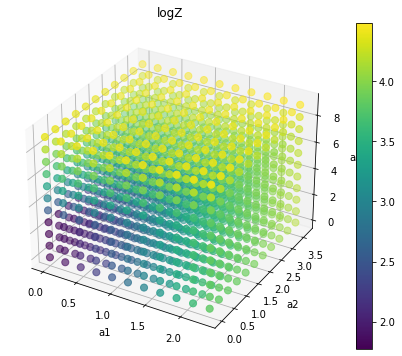

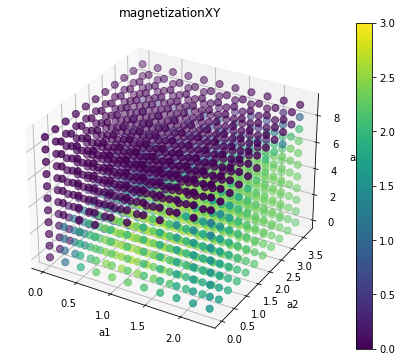

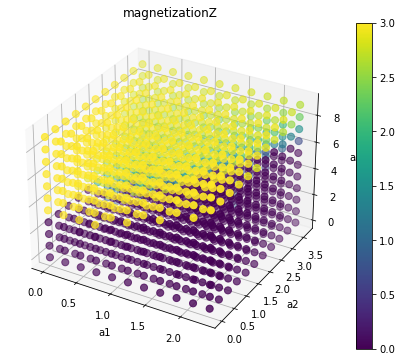

In [14]:
# %matplotlib widget
%matplotlib inline

def grid_plot(df,obs_name,clim=None):
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    p=ax.scatter(df['a1'],df['a2'],df['a3'],c=df[obs_name],cmap='viridis',s=50,vmin=clim and clim[0],vmax=clim and clim[1])
    ax.set_xlabel('a1')
    ax.set_ylabel('a2')
    ax.set_zlabel('a3')
    ax.set_title(obs_name)
    fig.colorbar(p)
    plt.show()

grid_plot(df,'logZ')
grid_plot(df,'magnetizationXY',clim=(0,3))
grid_plot(df,'magnetizationZ',clim=(0,3))

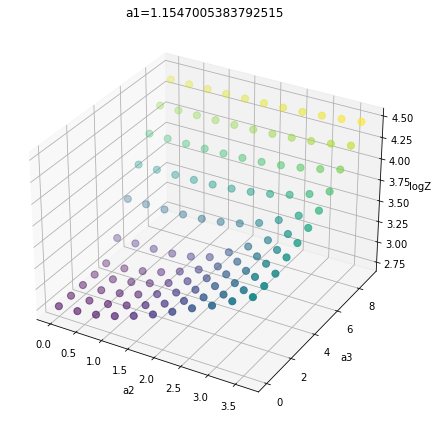

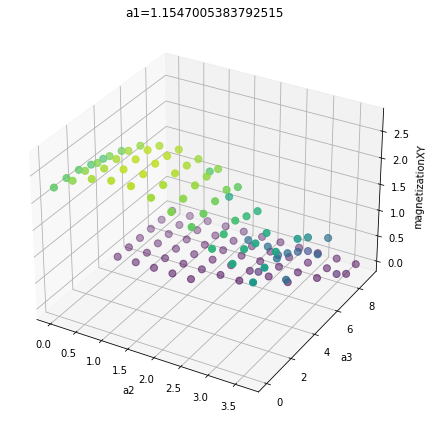

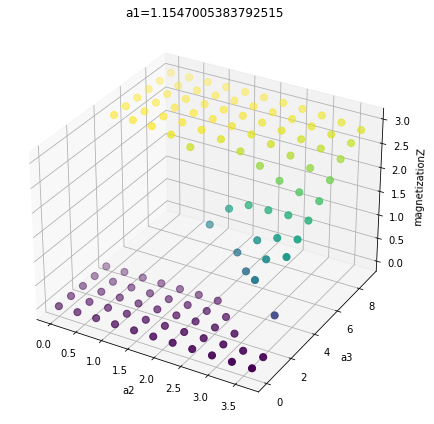

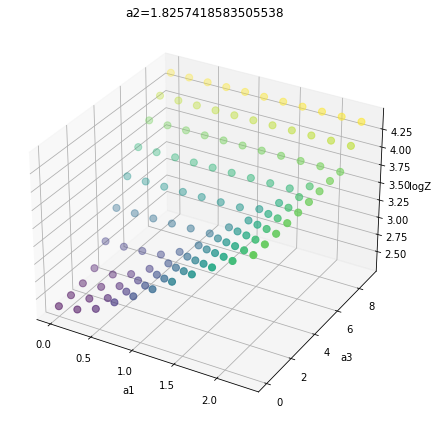

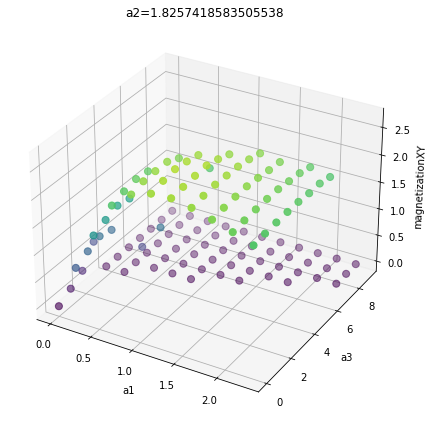

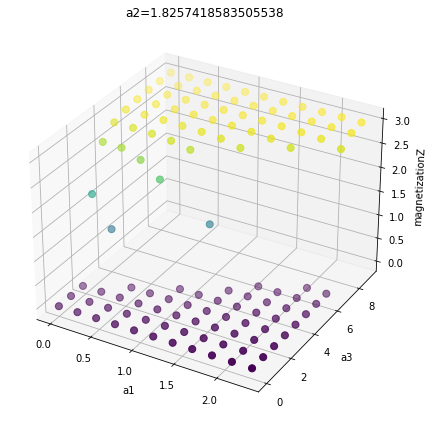

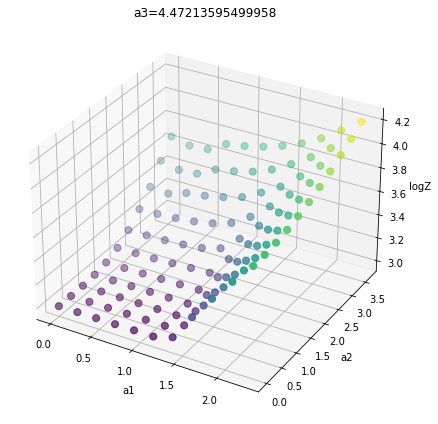

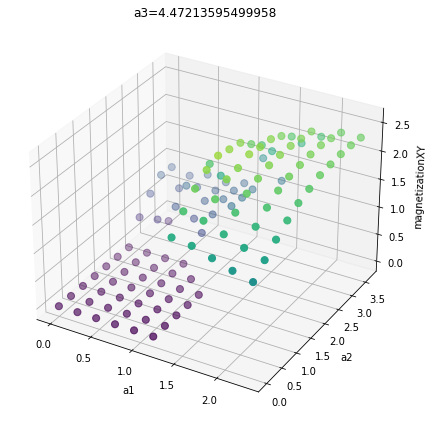

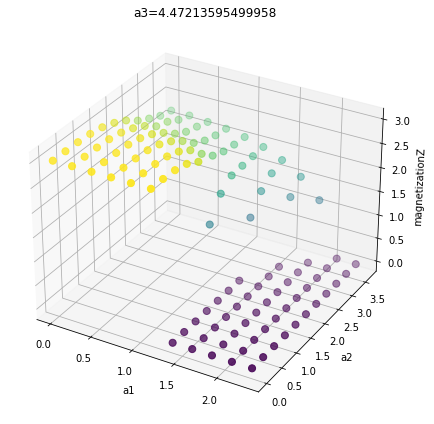

In [15]:
def section_plot(df,obs_name,slice_param_name,slice_value,clim=None):
    df=df[np.isclose(df[slice_param_name],slice_value)]
    other_param_names=[x for x in ['a1','a2','a3'] if x!=slice_param_name]
    # plt.scatter(df[other_param_names[0]],df[other_param_names[1]],c=df[obs_name],
    #             cmap='viridis',s=50,vmin=clim and clim[0],vmax=clim and clim[1])
    # plt.xlabel(other_param_names[0])
    # plt.ylabel(other_param_names[1])
    # plt.title("{obs_name} {slice_param_name}={slice_value}".format(obs_name=obs_name,slice_param_name=slice_param_name,slice_value=slice_value))
    # 3d plot
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    p=ax.scatter(df[other_param_names[0]],df[other_param_names[1]],df[obs_name],c=df[obs_name],cmap='viridis',s=50,vmin=clim and clim[0],vmax=clim and clim[1])
    ax.set_xlabel(other_param_names[0])
    ax.set_ylabel(other_param_names[1])
    ax.set_zlabel(obs_name)
    ax.set_title("{slice_param_name}={slice_value}".format(obs_name=obs_name,slice_param_name=slice_param_name,slice_value=slice_value))
    plt.tight_layout()
    plt.show()

section_plot(df,'logZ','a1',np.sqrt(20/15))
section_plot(df,'magnetizationXY','a1',np.sqrt(20/15),clim=(0,3))
section_plot(df,'magnetizationZ','a1',np.sqrt(20/15),clim=(0,3))

section_plot(df,'logZ','a2',np.sqrt(20/6))
section_plot(df,'magnetizationXY','a2',np.sqrt(20/6),clim=(0,3))
section_plot(df,'magnetizationZ','a2',np.sqrt(20/6),clim=(0,3))

section_plot(df,'logZ','a3',np.sqrt(20/1))
section_plot(df,'magnetizationXY','a3',np.sqrt(20/1),clim=(0,3))
section_plot(df,'magnetizationZ','a3',np.sqrt(20/1),clim=(0,3))